In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt

In [3]:
cat = '/content/drive/My Drive/Clip tokenization dataset/cat.jpg'
img = Image.open(cat)

In [4]:
extracter=ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model=ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [5]:
inputs=extracter(images=img,return_tensors='pt')

In [13]:
with torch.no_grad():
    start = time.time()
    output = model(**inputs)
    inference_time = time.time() - start

In [7]:
logits = output.logits
predicted_idx = logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_idx]

# logits = output.logits extracts the raw output scores (logits) for each class from the model’s output.
# predicted_class_idx = logits.argmax(-1).item() finds the index of the class with the highest score and converts it to a Python integer.

# ✅ Simple explanation of -1:
# Using argmax(-1) means taking the maximum along the last dimension of the tensor.
# ✔️ Here, logits might have shape [batch_size, num_classes], so -1 selects the class dimension to find which class has the highest score for each input.
# ✔️ It’s equivalent to argmax(dim=1) if logits are shaped as [batch, classes], but -1 is general for the last axis.

In [8]:
print(f"Inference time: {inference_time:.2f} seconds")
print(f"Predicted class: {predicted_label}")

Inference time: 0.77 seconds
Predicted class: tabby, tabby cat


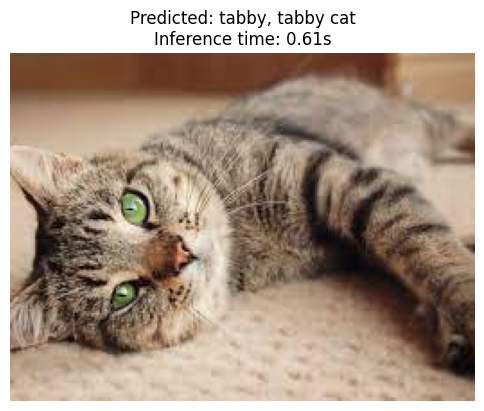

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}\nInference time: {inference_time:.2f}s", fontsize=12)
plt.axis('off')
plt.show()